## 1. Data Preprocessing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/ThirdYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


In [3]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [4]:
#looking for null values
data1.isnull().sum()

Attr1       0
Attr2       0
Attr3       0
Attr4      18
Attr5      25
         ... 
Attr60    592
Attr61     17
Attr62     43
Attr63     18
Attr64    228
Length: 64, dtype: int64

<Axes: >

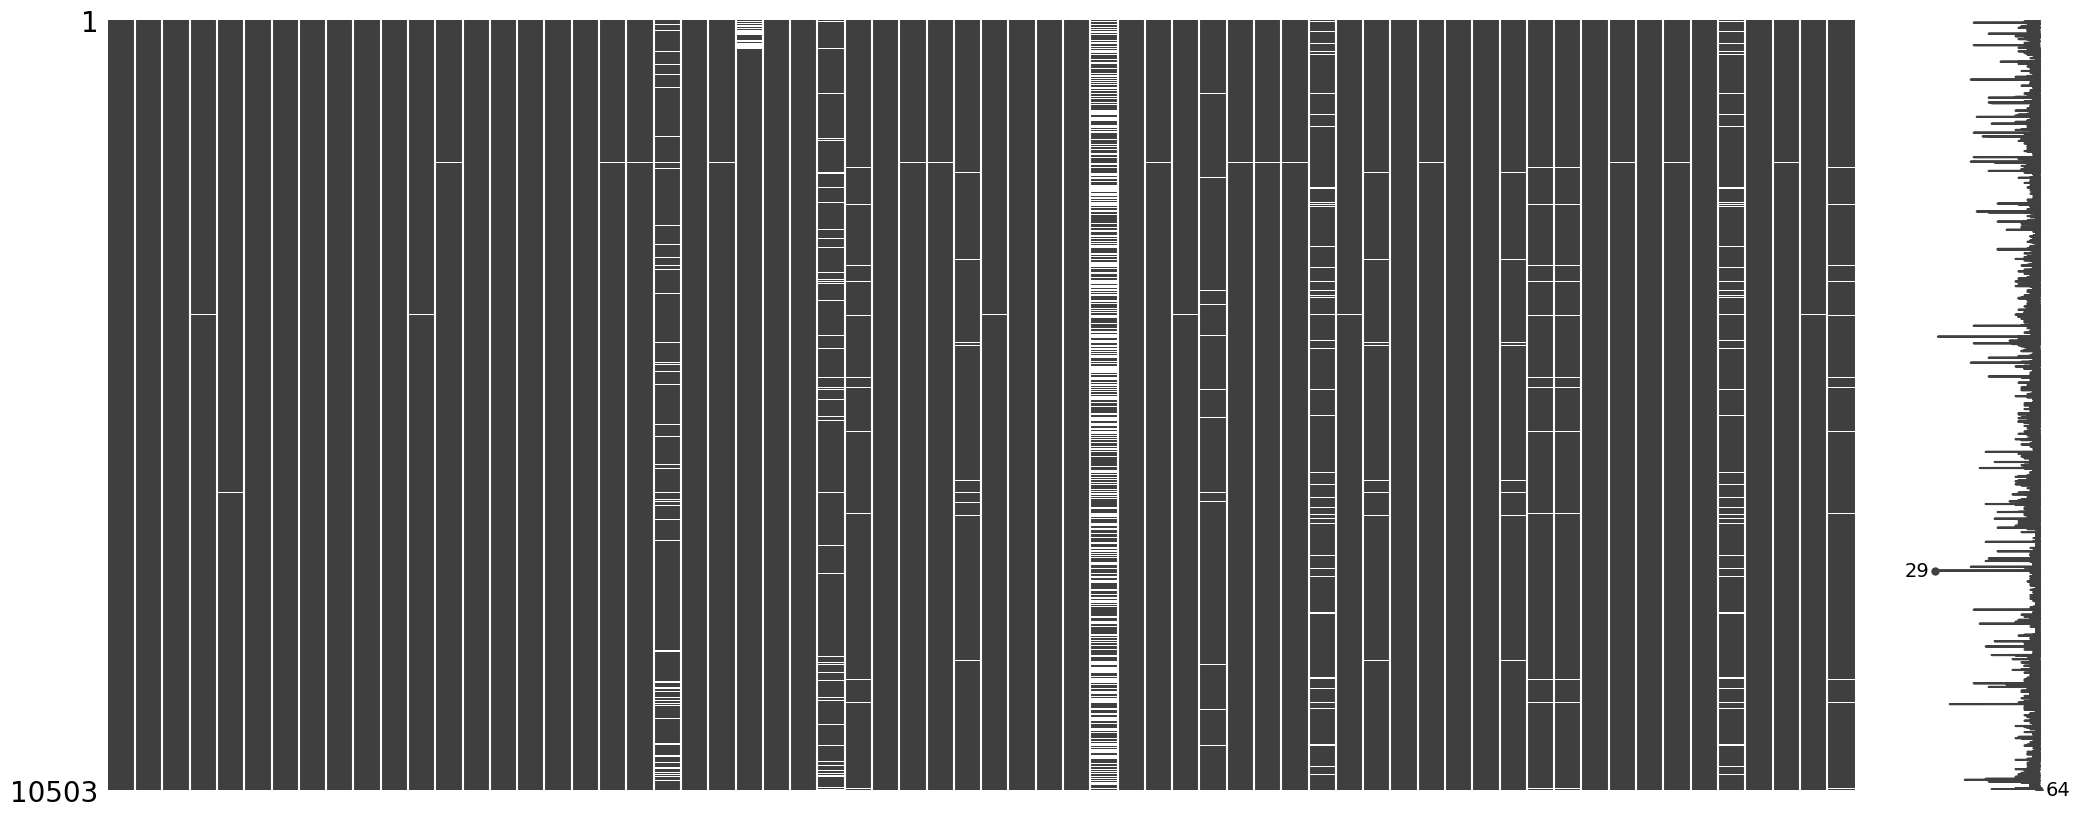

In [5]:
#Matrix for the Missing values
msno.matrix(data1)

In [6]:
#drop the null values
data_1st=data1.dropna()

In [7]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)

percentage of data loss after removing the null values:  53.48947919642008


## 2. Data Imputation
### 2.1 KNN Imputation

In [8]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(data1)

In [9]:
# Final Data 
data1 = pd.DataFrame(df_filled)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10503 non-null  float64
 1   1       10503 non-null  float64
 2   2       10503 non-null  float64
 3   3       10503 non-null  float64
 4   4       10503 non-null  float64
 5   5       10503 non-null  float64
 6   6       10503 non-null  float64
 7   7       10503 non-null  float64
 8   8       10503 non-null  float64
 9   9       10503 non-null  float64
 10  10      10503 non-null  float64
 11  11      10503 non-null  float64
 12  12      10503 non-null  float64
 13  13      10503 non-null  float64
 14  14      10503 non-null  float64
 15  15      10503 non-null  float64
 16  16      10503 non-null  float64
 17  17      10503 non-null  float64
 18  18      10503 non-null  float64
 19  19      10503 non-null  float64
 20  20      10503 non-null  float64
 21  21      10503 non-null  float64
 22

In [10]:
#rename column values
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROA            10503 non-null  float64
 1   TDTA           10503 non-null  float64
 2   WCTA           10503 non-null  float64
 3   CAAL           10503 non-null  float64
 4   DIR            10503 non-null  float64
 5   REL            10503 non-null  float64
 6   EBIT           10503 non-null  float64
 7   BV             10503 non-null  float64
 8   ATR            10503 non-null  float64
 9   ETA            10503 non-null  float64
 10  GPEIFE         10503 non-null  float64
 11  GPL            10503 non-null  float64
 12  GPDS           10503 non-null  float64
 13  GPI            10503 non-null  float64
 14  LGPD           10503 non-null  float64
 15  GPDL           10503 non-null  float64
 16  TATL           10503 non-null  float64
 17  GPA            10503 non-null  float64
 18  Revenu

## 3. Data Standardization

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4. Data Balance

In [12]:
# target feature 'class' Count
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (10008, 65)
class 1: (495, 65)


### 4.1 SMOTE Over-Sampling technique

In [13]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
X_train, y_train = smote.fit_resample(X_train,y_train)

## 5. Feature Selection
### 5.1 PCA Analysis

variance expalined: [7.75375726e-01 1.46675264e-01 2.26513693e-02 8.58728878e-03
 7.48606449e-03 7.04335431e-03 4.98203535e-03 4.68025814e-03
 4.55025471e-03 3.83119648e-03 2.92596912e-03 2.48440746e-03
 1.64657360e-03 1.40226211e-03 1.01839172e-03 1.00005448e-03
 8.12234028e-04 6.40230767e-04 5.78044677e-04 4.18246386e-04
 2.85264825e-04 1.70989584e-04 1.61735645e-04 1.50203562e-04
 6.84130556e-05 5.86606216e-05 4.92373308e-05 4.48946137e-05
 4.33019942e-05 3.75710047e-05 3.56667795e-05 2.21951946e-05
 1.87136791e-05 1.59717868e-05 9.02755852e-06 7.90743894e-06
 6.61316667e-06 4.07659950e-06 3.42739869e-06 2.51308468e-06
 2.26750857e-06 2.22040699e-06 1.53572715e-06 1.41066521e-06
 1.36140696e-06 1.29763547e-06 9.68137976e-07 8.96395495e-07
 7.30393130e-07 5.78857260e-07 3.85171623e-07 2.40992507e-07
 1.41796915e-07 1.13428748e-07 8.56296823e-08 6.99565787e-08
 4.58505184e-08 2.51300811e-08 8.50476844e-09 3.16195016e-09
 1.95047701e-09 6.99391796e-12 8.98110371e-13 3.00720170e-33]
var

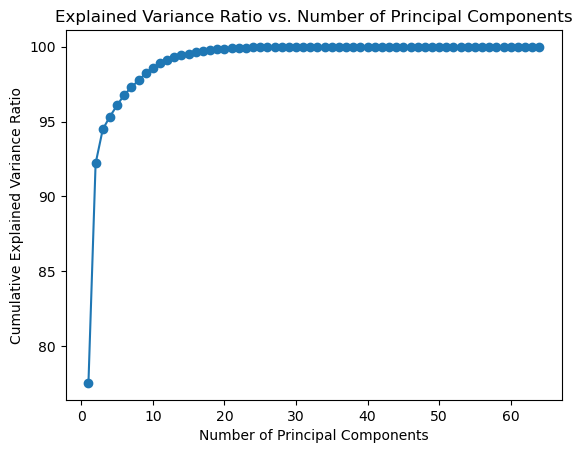

In [14]:
from sklearn.decomposition import PCA
# PCA Analysis for all components of train data
pca = PCA(n_components=64)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

variance expalined: [7.75375726e-01 1.46675264e-01 2.26513693e-02 8.58728878e-03
 7.48606449e-03 7.04335431e-03 4.98203535e-03 4.68025814e-03
 4.55025471e-03 3.83119648e-03 2.92596912e-03 2.48440746e-03
 1.64657360e-03 1.40226211e-03 1.01839172e-03 1.00005448e-03
 8.12234028e-04 6.40230767e-04 5.78044677e-04 4.18246386e-04]
variance : [77.54 92.21 94.48 95.34 96.09 96.79 97.29 97.76 98.22 98.6  98.89 99.14
 99.3  99.44 99.54 99.64 99.72 99.78 99.84 99.88]


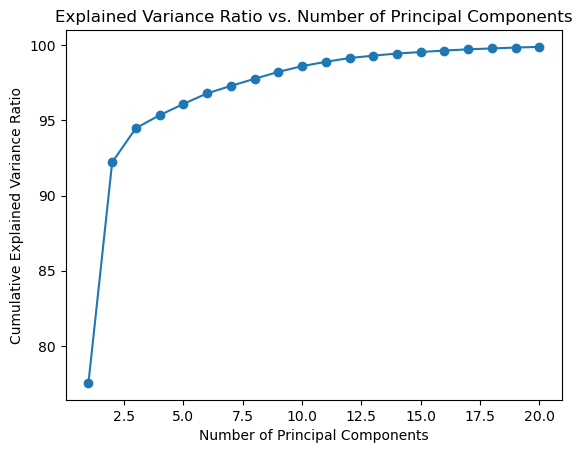

In [15]:
from sklearn.decomposition import PCA
# PCA Analysis with 20 components of train data
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_var_ratio = pca.explained_variance_ratio_
print("variance expalined:",explained_var_ratio)
cumulative_var_ratio = np.cumsum(np.round(explained_var_ratio,decimals=4)*100)
print("variance :", cumulative_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


## 6. Machine Learning techniques
### 6.1 Logistic regression

In [16]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression(max_iter = 300) 
LR.fit(X_train,y_train) 
LR_pred= LR.predict(X_test) 
#train and test accuracy scores
trACC_LR=LR.score(X_train,y_train) 
tesACC_LR=LR.score(X_test,y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #11.85


Train Accuracy for Logistic Regression :  0.6227851260294485
Test Accuracy for Logistic Regression :  0.1185149928605426 



In [17]:
#Confusion matrix
LR_cf = confusion_matrix(y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf)

#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 

confusion matrix for LR:
 [[ 155 1839]
 [  13   94]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.92      0.08      0.14      1994
           1       0.05      0.88      0.09       107

    accuracy                           0.12      2101
   macro avg       0.49      0.48      0.12      2101
weighted avg       0.88      0.12      0.14      2101



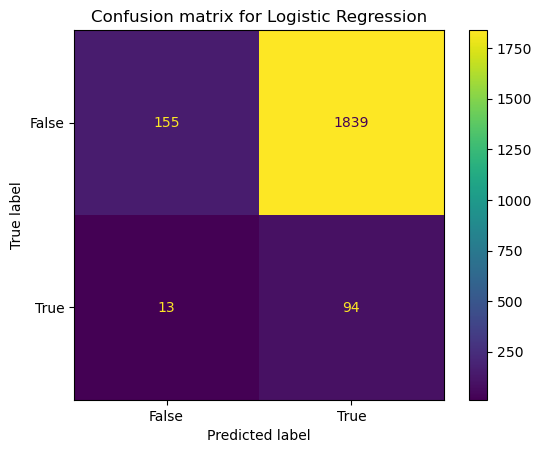

In [18]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train) 
DT_pred = DT.predict(X_test)
#train and test accuracies
trACC_DT=DT.score(X_train,y_train) 
tesACC_DT=DT.score(X_test,y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #81

Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.8100904331270823 



In [20]:
#Confusion Matrix
DT_cf = confusion_matrix(y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 

#Classification report of Confusion matrix 
DT_matrix = classification_report(y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[1689  305]
 [  94   13]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      1994
           1       0.04      0.12      0.06       107

    accuracy                           0.81      2101
   macro avg       0.49      0.48      0.48      2101
weighted avg       0.90      0.81      0.85      2101



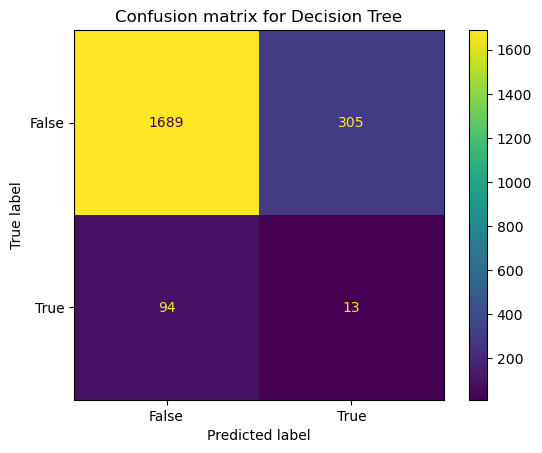

In [21]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.3 Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train) 
RF_pred = RF.predict(X_test)
#train and test accuracies
trACC_RF=RF.score(X_train,y_train) 
tesACC_RF=RF.score(X_test,y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #94.90


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.9490718705378391 



In [23]:
#Confusion Matrix
RF_cf = confusion_matrix(y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 

#Classification report of confusion matrix 
RF_matrix = classification_report(y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 

confusion matrix for RF:
 [[1994    0]
 [ 107    0]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1994
           1       0.00      0.00      0.00       107

    accuracy                           0.95      2101
   macro avg       0.47      0.50      0.49      2101
weighted avg       0.90      0.95      0.92      2101



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


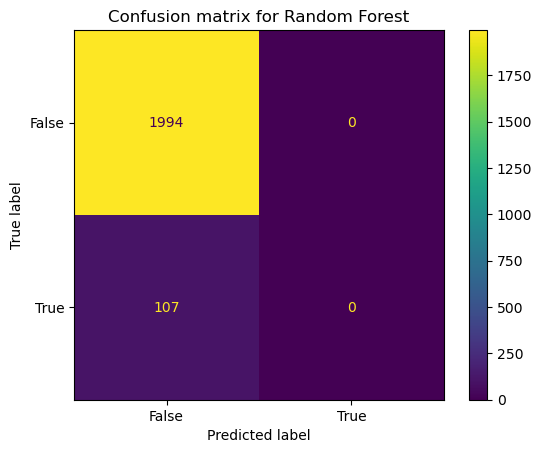

In [24]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
#train and test accuracies
trACC_GB=GB.score(X_train,y_train) 
tesACC_GB=GB.score(X_test,y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") # 68.53


Train Accuracy for Gradient Boost  :  0.7402670326927876
Test Accuracy for Gradient Boost :  0.6853879105188005 



In [26]:
#Confusion Matrix
GB_cf = confusion_matrix(y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 

#Classification report of Confusion matrix
GB_matrix = classification_report(y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix)


confusion matrix for GB:
 [[1422  572]
 [  89   18]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      1994
           1       0.03      0.17      0.05       107

    accuracy                           0.69      2101
   macro avg       0.49      0.44      0.43      2101
weighted avg       0.89      0.69      0.77      2101



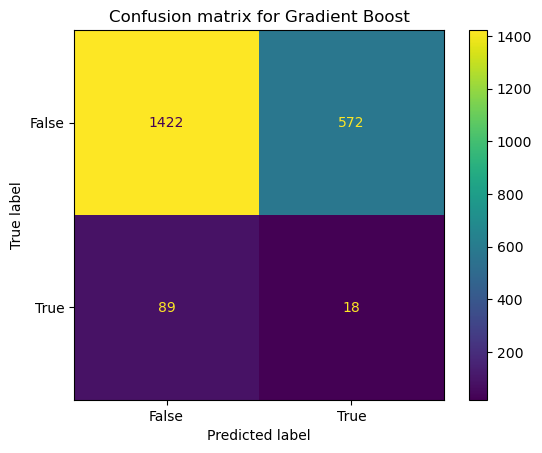

In [27]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classifier (XGBoosting)

In [28]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
#train and test Accuracies
trACC_XGB=XGB.score(X_train,y_train) 
tesACC_XGB=XGB.score(X_test,y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #65

Train Accuracy for Xtreme Gradient Boost  :  0.7874344896431246
Test Accuracy for Xtreme Gradient Boost :  0.6501665873393622 



In [29]:
#Confusion Matrix
XGB_cf = confusion_matrix(y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 

#Classification report of Confusion matrix 
XGB_matrix = classification_report(y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix) 


confusion matrix for XGB:
 [[1359  635]
 [ 100    7]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79      1994
           1       0.01      0.07      0.02       107

    accuracy                           0.65      2101
   macro avg       0.47      0.37      0.40      2101
weighted avg       0.88      0.65      0.75      2101



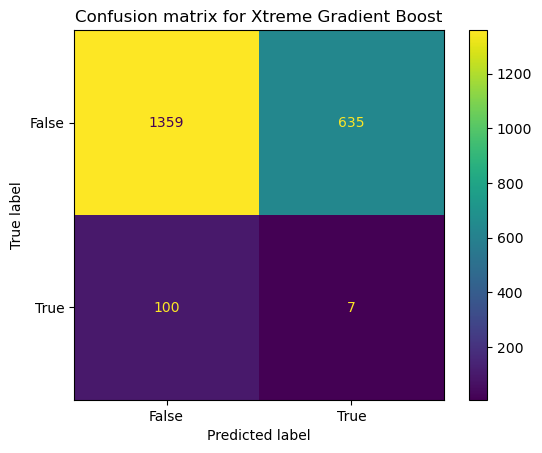

In [30]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine

In [31]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
#train and test Accuracies
trACC_svc=svc.score(X_train,y_train) 
tesACC_svc=svc.score(X_test,y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #14.04


Train Accuracy for SVM  :  0.6728225605190916
Test Accuracy for SVM :  0.14040932889100427 



In [32]:
#Confusion Matrix
svc_cf = confusion_matrix(y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf) 

#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix) 

confusion matrix for SVM:
 [[ 211 1783]
 [  23   84]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.90      0.11      0.19      1994
           1       0.04      0.79      0.09       107

    accuracy                           0.14      2101
   macro avg       0.47      0.45      0.14      2101
weighted avg       0.86      0.14      0.18      2101



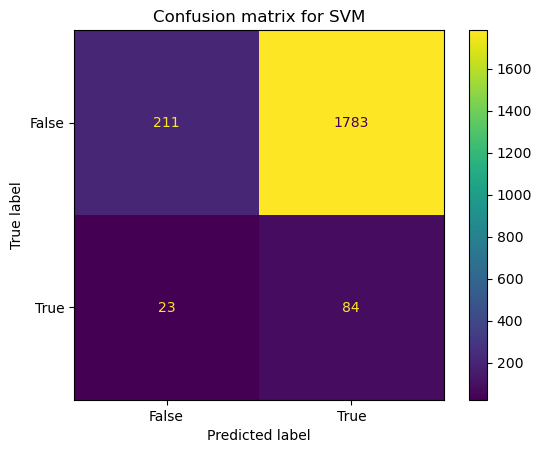

In [33]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [34]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_prob)

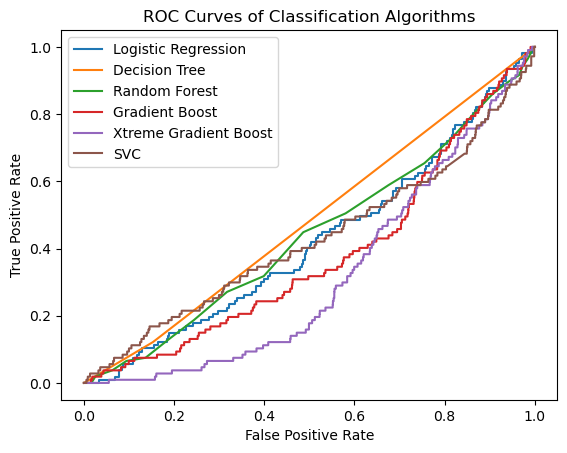

In [35]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

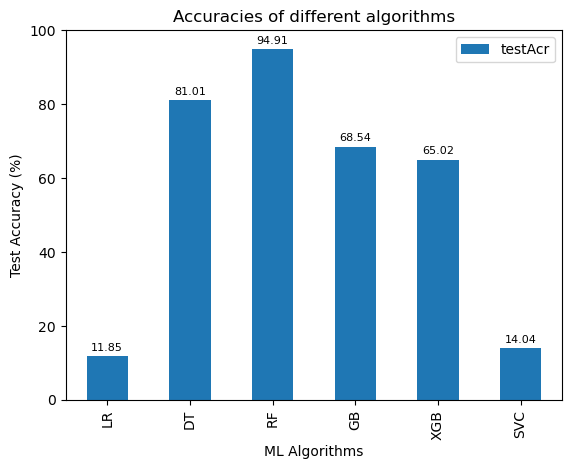

In [36]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.ylim(0,100)
plt.show()